In [1]:
!pip install segment-geospatial leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 617.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

### Leo los datos de entrada: dataset, objetivo y sitios con datos geograficos

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesis I/Dataset/_select_from_estadisticas_lte_erbs_eutrancellfdd_ul_inter_hour_w_202303221102.zip')

In [4]:
objetivo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesis I/Dataset/Celdas Interferidas 2023-03-03.txt', sep='\t')

In [5]:
sitios=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesis I/Dataset/nodos_geo.txt',sep='\t')

In [6]:
dataset.shape

(137200, 103)

In [7]:
len(dataset['EnodeB'].unique())

1942

In [8]:
sitios.head()

,nodo,sector,Latitud,Longitud,Altura,azimuth
0,AN029,1,-23.1132,-63.9979,45.0,0.0
1,AN029,2,-23.1132,-63.9979,45.0,120.0
2,AN029,3,-23.1132,-63.9979,45.0,240.0
3,AN028,1,-23.2620,-63.7400,36.0,0.0
4,AN028,2,-23.2620,-63.7400,36.0,120.0


In [9]:
objetivo.tail()

,EnodeB,Cell,time,Interferida
137195,SWW030,MWW030C,3/3/2023,NaN
137196,SWW030,MWW030C,3/3/2023,NaN
137197,SWW030,MWW030C,3/3/2023,NaN
137198,SWW030,MWW030C,3/3/2023,NaN
137199,SWW030,MWW030C,3/3/2023,NaN


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137200 entries, 0 to 137199
Columns: 103 entries, EnodeB to pmRadioRecInterferencePwrPrb100
dtypes: float64(100), object(3)
memory usage: 107.8+ MB


In [11]:
dataset.shape

(137200, 103)

In [12]:
dataset.head()

,EnodeB,Cell,time,pmRadioRecInterferencePwrPrb1,pmRadioRecInterferencePwrPrb2,pmRadioRecInterferencePwrPrb3,pmRadioRecInterferencePwrPrb4,pmRadioRecInterferencePwrPrb5,pmRadioRecInterferencePwrPrb6,pmRadioRecInterferencePwrPrb7,...,pmRadioRecInterferencePwrPrb91,pmRadioRecInterferencePwrPrb92,pmRadioRecInterferencePwrPrb93,pmRadioRecInterferencePwrPrb94,pmRadioRecInterferencePwrPrb95,pmRadioRecInterferencePwrPrb96,pmRadioRecInterferencePwrPrb97,pmRadioRecInterferencePwrPrb98,pmRadioRecInterferencePwrPrb99,pmRadioRecInterferencePwrPrb100
0,SB0041,MB0041A,2023-03-03 00:00:00.0,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SB0041,MB0041A,2023-03-03 01:00:00.0,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SB0041,MB0041A,2023-03-03 02:00:00.0,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SB0041,MB0041A,2023-03-03 03:00:00.0,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SB0041,MB0041A,2023-03-03 04:00:00.0,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset.tail()

,EnodeB,Cell,time,pmRadioRecInterferencePwrPrb1,pmRadioRecInterferencePwrPrb2,pmRadioRecInterferencePwrPrb3,pmRadioRecInterferencePwrPrb4,pmRadioRecInterferencePwrPrb5,pmRadioRecInterferencePwrPrb6,pmRadioRecInterferencePwrPrb7,...,pmRadioRecInterferencePwrPrb91,pmRadioRecInterferencePwrPrb92,pmRadioRecInterferencePwrPrb93,pmRadioRecInterferencePwrPrb94,pmRadioRecInterferencePwrPrb95,pmRadioRecInterferencePwrPrb96,pmRadioRecInterferencePwrPrb97,pmRadioRecInterferencePwrPrb98,pmRadioRecInterferencePwrPrb99,pmRadioRecInterferencePwrPrb100
137195,SWW030,MWW030C,2023-03-03 19:00:00.0,-119.9,-119.9,-120.0,-119.7,-119.8,-120.0,-120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137196,SWW030,MWW030C,2023-03-03 20:00:00.0,-119.9,-120.0,-119.8,-119.8,-119.8,-120.2,-120.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137197,SWW030,MWW030C,2023-03-03 21:00:00.0,-119.8,-120.0,-120.0,-119.7,-119.7,-120.1,-120.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137198,SWW030,MWW030C,2023-03-03 22:00:00.0,-119.6,-120.0,-120.0,-119.5,-119.5,-120.0,-120.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137199,SWW030,MWW030C,2023-03-03 23:00:00.0,-119.8,-120.0,-120.0,-119.2,-119.2,-120.0,-120.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# convert the timestamp column to datetime
dataset['time'] = pd.to_datetime(dataset['time'])

# extract hour from the timestamp column to create an time_hour column
dataset['time_hour'] = dataset['time'].dt.hour
dataset['time_date'] = dataset['time'].dt.date

In [15]:
dataset[dataset['Cell']=='MB0041A'][0:5]

,EnodeB,Cell,time,pmRadioRecInterferencePwrPrb1,pmRadioRecInterferencePwrPrb2,pmRadioRecInterferencePwrPrb3,pmRadioRecInterferencePwrPrb4,pmRadioRecInterferencePwrPrb5,pmRadioRecInterferencePwrPrb6,pmRadioRecInterferencePwrPrb7,...,pmRadioRecInterferencePwrPrb93,pmRadioRecInterferencePwrPrb94,pmRadioRecInterferencePwrPrb95,pmRadioRecInterferencePwrPrb96,pmRadioRecInterferencePwrPrb97,pmRadioRecInterferencePwrPrb98,pmRadioRecInterferencePwrPrb99,pmRadioRecInterferencePwrPrb100,time_hour,time_date
0,SB0041,MB0041A,2023-03-03 00:00:00,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-03-03
1,SB0041,MB0041A,2023-03-03 01:00:00,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2023-03-03
2,SB0041,MB0041A,2023-03-03 02:00:00,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2023-03-03
3,SB0041,MB0041A,2023-03-03 03:00:00,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2023-03-03
4,SB0041,MB0041A,2023-03-03 04:00:00,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2023-03-03


Recorto los nombres de columnas para graficas mas limpias

In [16]:
pmRadioInterf=dataset.columns[dataset.columns.str.contains('pmRadio')]

In [17]:
col={'pmRadioRecInterferencePwrPrb1':'PwrPrb1','pmRadioRecInterferencePwrPrb2':'PwrPrb2','pmRadioRecInterferencePwrPrb3':'PwrPrb3','pmRadioRecInterferencePwrPrb4':'PwrPrb4','pmRadioRecInterferencePwrPrb5':'PwrPrb5',
'pmRadioRecInterferencePwrPrb6':'PwrPrb6','pmRadioRecInterferencePwrPrb7':'PwrPrb7','pmRadioRecInterferencePwrPrb8':'PwrPrb8','pmRadioRecInterferencePwrPrb9':'PwrPrb9',
'pmRadioRecInterferencePwrPrb10':'PwrPrb10','pmRadioRecInterferencePwrPrb11':'PwrPrb11','pmRadioRecInterferencePwrPrb12':'PwrPrb12','pmRadioRecInterferencePwrPrb13':'PwrPrb13',
'pmRadioRecInterferencePwrPrb14':'PwrPrb14','pmRadioRecInterferencePwrPrb15':'PwrPrb15','pmRadioRecInterferencePwrPrb16':'PwrPrb16','pmRadioRecInterferencePwrPrb17':'PwrPrb17',
'pmRadioRecInterferencePwrPrb18':'PwrPrb18','pmRadioRecInterferencePwrPrb19':'PwrPrb19','pmRadioRecInterferencePwrPrb20':'PwrPrb20','pmRadioRecInterferencePwrPrb21':'PwrPrb21',
'pmRadioRecInterferencePwrPrb22':'PwrPrb22','pmRadioRecInterferencePwrPrb23':'PwrPrb23','pmRadioRecInterferencePwrPrb24':'PwrPrb24','pmRadioRecInterferencePwrPrb25':'PwrPrb25',
'pmRadioRecInterferencePwrPrb26':'PwrPrb26','pmRadioRecInterferencePwrPrb27':'PwrPrb27','pmRadioRecInterferencePwrPrb28':'PwrPrb28','pmRadioRecInterferencePwrPrb29':'PwrPrb29',
'pmRadioRecInterferencePwrPrb30':'PwrPrb30','pmRadioRecInterferencePwrPrb31':'PwrPrb31','pmRadioRecInterferencePwrPrb32':'PwrPrb32','pmRadioRecInterferencePwrPrb33':'PwrPrb33',
'pmRadioRecInterferencePwrPrb34':'PwrPrb34','pmRadioRecInterferencePwrPrb35':'PwrPrb35','pmRadioRecInterferencePwrPrb36':'PwrPrb36','pmRadioRecInterferencePwrPrb37':'PwrPrb37',
'pmRadioRecInterferencePwrPrb38':'PwrPrb38','pmRadioRecInterferencePwrPrb39':'PwrPrb39','pmRadioRecInterferencePwrPrb40':'PwrPrb40','pmRadioRecInterferencePwrPrb41':'PwrPrb41',
'pmRadioRecInterferencePwrPrb42':'PwrPrb42','pmRadioRecInterferencePwrPrb43':'PwrPrb43','pmRadioRecInterferencePwrPrb44':'PwrPrb44','pmRadioRecInterferencePwrPrb45':'PwrPrb45',
'pmRadioRecInterferencePwrPrb46':'PwrPrb46','pmRadioRecInterferencePwrPrb47':'PwrPrb47','pmRadioRecInterferencePwrPrb48':'PwrPrb48','pmRadioRecInterferencePwrPrb49':'PwrPrb49',
'pmRadioRecInterferencePwrPrb50':'PwrPrb50','pmRadioRecInterferencePwrPrb51':'PwrPrb51','pmRadioRecInterferencePwrPrb52':'PwrPrb52','pmRadioRecInterferencePwrPrb53':'PwrPrb53',
'pmRadioRecInterferencePwrPrb54':'PwrPrb54','pmRadioRecInterferencePwrPrb55':'PwrPrb55','pmRadioRecInterferencePwrPrb56':'PwrPrb56','pmRadioRecInterferencePwrPrb57':'PwrPrb57',
'pmRadioRecInterferencePwrPrb58':'PwrPrb58','pmRadioRecInterferencePwrPrb59':'PwrPrb59','pmRadioRecInterferencePwrPrb60':'PwrPrb60','pmRadioRecInterferencePwrPrb61':'PwrPrb61',
'pmRadioRecInterferencePwrPrb62':'PwrPrb62','pmRadioRecInterferencePwrPrb63':'PwrPrb63','pmRadioRecInterferencePwrPrb64':'PwrPrb64','pmRadioRecInterferencePwrPrb65':'PwrPrb65',
'pmRadioRecInterferencePwrPrb66':'PwrPrb66','pmRadioRecInterferencePwrPrb67':'PwrPrb67','pmRadioRecInterferencePwrPrb68':'PwrPrb68','pmRadioRecInterferencePwrPrb69':'PwrPrb69',
'pmRadioRecInterferencePwrPrb70':'PwrPrb70','pmRadioRecInterferencePwrPrb71':'PwrPrb71','pmRadioRecInterferencePwrPrb72':'PwrPrb72','pmRadioRecInterferencePwrPrb73':'PwrPrb73',
'pmRadioRecInterferencePwrPrb74':'PwrPrb74','pmRadioRecInterferencePwrPrb75':'PwrPrb75','pmRadioRecInterferencePwrPrb76':'PwrPrb76','pmRadioRecInterferencePwrPrb77':'PwrPrb77',
'pmRadioRecInterferencePwrPrb78':'PwrPrb78','pmRadioRecInterferencePwrPrb79':'PwrPrb79','pmRadioRecInterferencePwrPrb80':'PwrPrb80','pmRadioRecInterferencePwrPrb81':'PwrPrb81',
'pmRadioRecInterferencePwrPrb82':'PwrPrb82','pmRadioRecInterferencePwrPrb83':'PwrPrb83','pmRadioRecInterferencePwrPrb84':'PwrPrb84','pmRadioRecInterferencePwrPrb85':'PwrPrb85',
'pmRadioRecInterferencePwrPrb86':'PwrPrb86','pmRadioRecInterferencePwrPrb87':'PwrPrb87','pmRadioRecInterferencePwrPrb88':'PwrPrb88','pmRadioRecInterferencePwrPrb89':'PwrPrb89',
'pmRadioRecInterferencePwrPrb90':'PwrPrb90','pmRadioRecInterferencePwrPrb91':'PwrPrb91','pmRadioRecInterferencePwrPrb92':'PwrPrb92','pmRadioRecInterferencePwrPrb93':'PwrPrb93',
'pmRadioRecInterferencePwrPrb94':'PwrPrb94','pmRadioRecInterferencePwrPrb95':'PwrPrb95','pmRadioRecInterferencePwrPrb96':'PwrPrb96','pmRadioRecInterferencePwrPrb97':'PwrPrb97',
'pmRadioRecInterferencePwrPrb98':'PwrPrb98','pmRadioRecInterferencePwrPrb99':'PwrPrb99','pmRadioRecInterferencePwrPrb100':'PwrPrb100'}
col1=['PwrPrb1','PwrPrb2','PwrPrb3','PwrPrb4','PwrPrb5','PwrPrb6','PwrPrb7','PwrPrb8','PwrPrb9','PwrPrb10','PwrPrb11','PwrPrb12','PwrPrb13','PwrPrb14','PwrPrb15','PwrPrb16','PwrPrb17','PwrPrb18','PwrPrb19','PwrPrb20','PwrPrb21',
'PwrPrb22','PwrPrb23','PwrPrb24','PwrPrb25','PwrPrb26','PwrPrb27','PwrPrb28','PwrPrb29','PwrPrb30','PwrPrb31','PwrPrb32','PwrPrb33','PwrPrb34','PwrPrb35','PwrPrb36','PwrPrb37','PwrPrb38','PwrPrb39','PwrPrb40','PwrPrb41','PwrPrb42',
'PwrPrb43','PwrPrb44','PwrPrb45','PwrPrb46','PwrPrb47','PwrPrb48','PwrPrb49','PwrPrb50','PwrPrb51','PwrPrb52','PwrPrb53','PwrPrb54','PwrPrb55','PwrPrb56','PwrPrb57','PwrPrb58','PwrPrb59','PwrPrb60','PwrPrb61','PwrPrb62','PwrPrb63',
'PwrPrb64','PwrPrb65','PwrPrb66','PwrPrb67','PwrPrb68','PwrPrb69','PwrPrb70','PwrPrb71','PwrPrb72','PwrPrb73','PwrPrb74','PwrPrb75','PwrPrb76','PwrPrb77','PwrPrb78','PwrPrb79','PwrPrb80','PwrPrb81','PwrPrb82','PwrPrb83','PwrPrb84',
'PwrPrb85','PwrPrb86','PwrPrb87','PwrPrb88','PwrPrb89','PwrPrb90','PwrPrb91','PwrPrb92','PwrPrb93','PwrPrb94','PwrPrb95','PwrPrb96','PwrPrb97','PwrPrb98','PwrPrb99','PwrPrb100']

In [18]:
dataset.rename(columns=col, inplace=True)

In [19]:
dataset.iloc[:5, :53]

,EnodeB,Cell,time,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,...,PwrPrb41,PwrPrb42,PwrPrb43,PwrPrb44,PwrPrb45,PwrPrb46,PwrPrb47,PwrPrb48,PwrPrb49,PwrPrb50
0,SB0041,MB0041A,2023-03-03 00:00:00,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,...,-115.9,-115.9,-115.8,-115.8,-115.7,-115.7,-115.3,-115.4,-115.6,-115.5
1,SB0041,MB0041A,2023-03-03 01:00:00,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,...,-115.9,-115.8,-115.8,-115.8,-115.7,-115.7,-115.3,-115.5,-115.5,-115.4
2,SB0041,MB0041A,2023-03-03 02:00:00,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,...,-115.8,-115.8,-115.8,-115.8,-115.7,-115.6,-115.2,-115.4,-115.5,-115.5
3,SB0041,MB0041A,2023-03-03 03:00:00,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,...,-115.8,-115.7,-115.7,-115.7,-115.7,-115.7,-115.3,-115.5,-115.5,-115.3
4,SB0041,MB0041A,2023-03-03 04:00:00,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,...,-115.8,-115.8,-115.8,-115.7,-115.6,-115.6,-115.3,-115.5,-115.5,-115.4


Debido al ancho de banda de los nodos de 10 MHz los datos de los PRBs > 50 son nulos. Se observan algunos registros de la muestra tambien son nulos.

### Analisis del dataset, investigacion de valores. Distribuciones, etc

In [20]:
#dataset[col1].
nulos=pd.DataFrame(dataset[col1].isnull().sum(axis = 0)).reset_index()

In [21]:
nulos.rename(columns={'index':'prb_num',0:'cant_nulos'}, inplace=True)

In [22]:
nulos['cant_reg']=dataset.shape[0]
nulos['%_nulos']=100*nulos['cant_nulos']/nulos['cant_reg']

In [23]:
nulos.head()

,prb_num,cant_nulos,cant_reg,%_nulos
0,PwrPrb1,2430,137200,1.771137
1,PwrPrb2,2430,137200,1.771137
2,PwrPrb3,2430,137200,1.771137
3,PwrPrb4,2430,137200,1.771137
4,PwrPrb5,2430,137200,1.771137


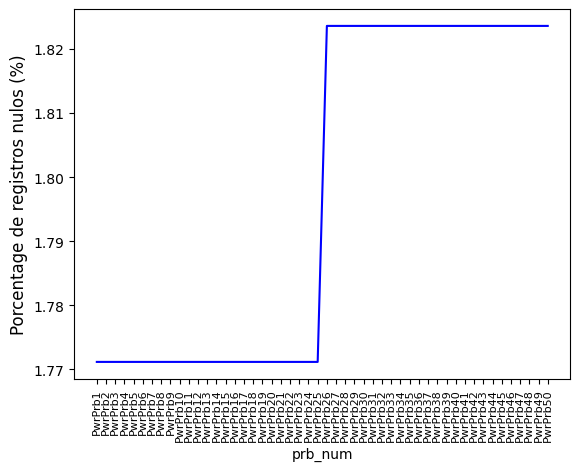

In [24]:
sns.lineplot(data=nulos[0:50], x='prb_num', y='%_nulos', color='Blue')
plt.xticks(rotation = 90);
#plt.title('monthly entries',fontsize=40)
#plt.xlabel('PRBs',fontsize=12)
plt.ylabel('Porcentage de registros nulos (%)',fontsize=12)
plt.xticks(fontsize=8);
plt.yticks(fontsize=10);

In [25]:
nulos.shape

(100, 4)

In [26]:
nulos.head()

,prb_num,cant_nulos,cant_reg,%_nulos
0,PwrPrb1,2430,137200,1.771137
1,PwrPrb2,2430,137200,1.771137
2,PwrPrb3,2430,137200,1.771137
3,PwrPrb4,2430,137200,1.771137
4,PwrPrb5,2430,137200,1.771137


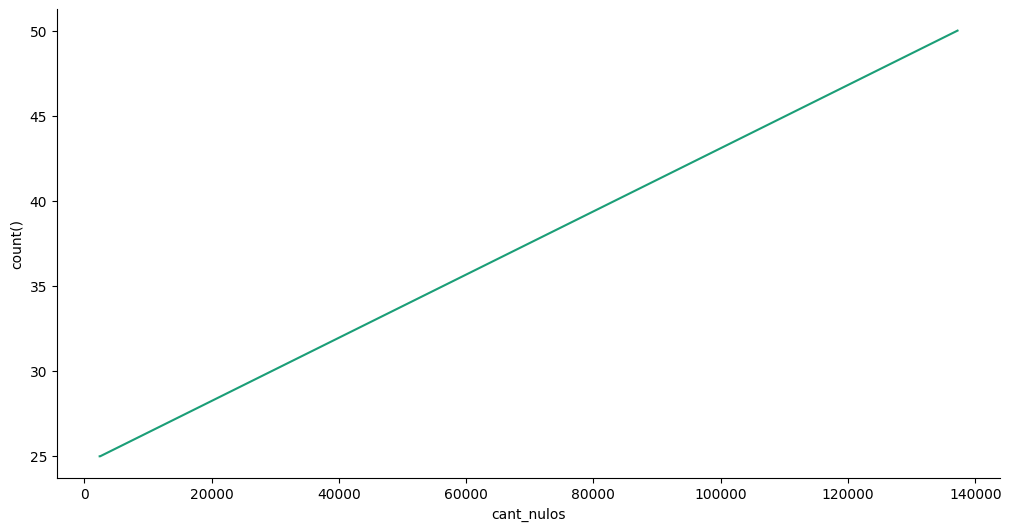

In [27]:
# @title cant_nulos vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cant_nulos']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cant_nulos'}, axis=1)
              .sort_values('cant_nulos', ascending=True))
  xs = counted['cant_nulos']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = nulos.sort_values('cant_nulos', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cant_nulos')
_ = plt.ylabel('count()')

Diagrama de cajas de los primeros 50 PRBs para observar a distribucion de los datos.

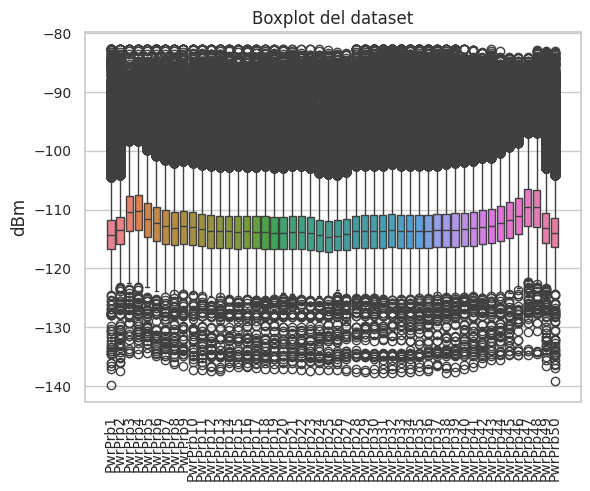

In [28]:
sns.set(style='whitegrid')
#fmri = seaborn.load_dataset("fmri")
sns.boxplot(data=dataset[col1[0:50]]).set(title='Boxplot del dataset')
#sns.boxplot(x=pd.DataFrame(pmRadioInterf[0:50]), y=dataset[pmRadioInterf[0:50]],  data=dataset)
plt.ylabel('dBm')
plt.xticks(rotation = 90)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.locator_params(axis='x', nbins=20)
plt.show()

In [29]:
dataset[col1[0:50]]

,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,PwrPrb8,PwrPrb9,PwrPrb10,...,PwrPrb41,PwrPrb42,PwrPrb43,PwrPrb44,PwrPrb45,PwrPrb46,PwrPrb47,PwrPrb48,PwrPrb49,PwrPrb50
0,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,-116.8,-112.3,-116.7,...,-115.9,-115.9,-115.8,-115.8,-115.7,-115.7,-115.3,-115.4,-115.6,-115.5
1,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,-116.8,-112.3,-116.7,...,-115.9,-115.8,-115.8,-115.8,-115.7,-115.7,-115.3,-115.5,-115.5,-115.4
2,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,-116.8,-112.3,-116.7,...,-115.8,-115.8,-115.8,-115.8,-115.7,-115.6,-115.2,-115.4,-115.5,-115.5
3,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,-116.7,-112.3,-116.7,...,-115.8,-115.7,-115.7,-115.7,-115.7,-115.7,-115.3,-115.5,-115.5,-115.3
4,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,-116.8,-112.4,-116.7,...,-115.8,-115.8,-115.8,-115.7,-115.6,-115.6,-115.3,-115.5,-115.5,-115.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137195,-119.9,-119.9,-120.0,-119.7,-119.8,-120.0,-120.0,-120.1,-120.1,-120.1,...,-120.2,-120.2,-120.2,-120.2,-120.2,-120.0,-120.0,-120.1,-120.1,-120.1
137196,-119.9,-120.0,-119.8,-119.8,-119.8,-120.2,-120.2,-120.2,-120.3,-120.3,...,-120.3,-120.3,-120.2,-120.2,-120.2,-120.0,-120.0,-120.1,-120.2,-120.2
137197,-119.8,-120.0,-120.0,-119.7,-119.7,-120.1,-120.2,-120.2,-120.2,-120.2,...,-120.2,-120.2,-120.2,-120.2,-120.2,-120.0,-120.0,-120.1,-120.1,-120.1
137198,-119.6,-120.0,-120.0,-119.5,-119.5,-120.0,-120.1,-120.1,-120.2,-120.2,...,-120.2,-120.2,-120.2,-120.1,-120.0,-119.7,-119.6,-120.1,-120.1,-120.1


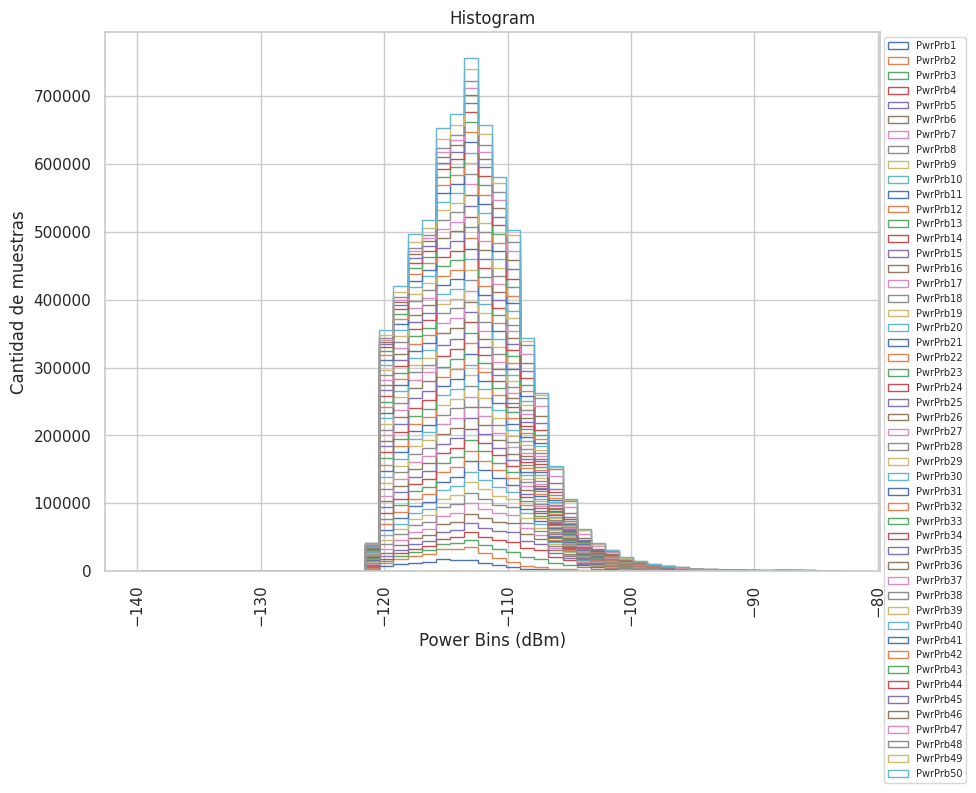

In [30]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('legend', fontsize=7)
ax=dataset[col1[0:50]].plot(kind='hist', title='Histogram', bins=50,  histtype='step', stacked=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation = 90)
plt.xlabel('Power Bins (dBm)')
plt.show()

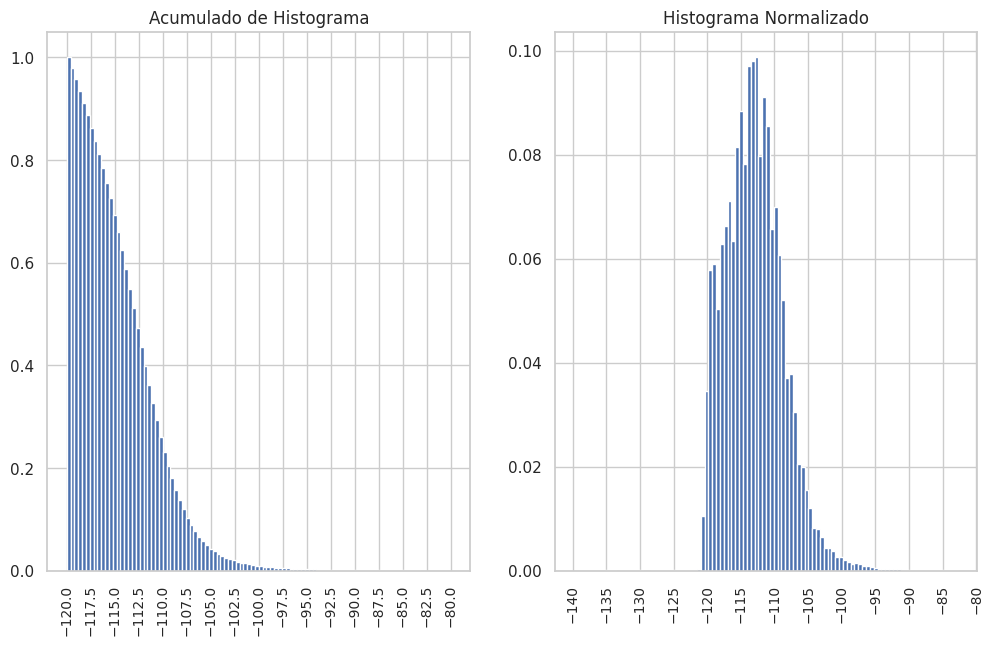

In [31]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

axes[0].set_title('Acumulado de Histograma')
axes[0].hist(dataset[col1[0:50]].to_numpy().flatten(), bins=100,density=True,cumulative=-1,range=[-120, -80],)
#plt.ylabel('dBm')

axes[0].tick_params(axis='x', labelrotation=90 )
#plt.xticks(fontsize=8);
axes[0].xaxis.set_tick_params(labelsize=10)
axes[0].locator_params(axis='x', nbins=20)

axes[1].set_title('Histograma Normalizado')
axes[1].hist(dataset[col1[0:50]].to_numpy().flatten(), bins=100,density=True)
#plt.ylabel('dBm')
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].xaxis.set_tick_params(labelsize=10)
axes[1].locator_params(axis='x', nbins=20)


plt.show()

In [32]:
def db2mw(x):
  p=1000*pow(10,(x/10))
  return p

def mw2db(x):
  p=10*np.log10(x/1000)
  return p

In [33]:
db2mw(-166.7)

2.1379620895022412e-14

In [34]:
mw2db(2.1379620895022412e-14)

-166.7

In [35]:
dataset['PwrPrb1'][dataset['Cell']=='MB0041A'][0:5]

0   -116.7
1   -116.7
2   -116.7
3   -116.6
4   -116.6
Name: PwrPrb1, dtype: float64

In [36]:
dataset_mw = dataset[col1].apply(db2mw)

In [37]:
dataset_mw.head()

,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,PwrPrb8,PwrPrb9,PwrPrb10,...,PwrPrb91,PwrPrb92,PwrPrb93,PwrPrb94,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100
0,2.137962e-09,2.187762e-09,2.238721e-09,2.398833e-09,2.137962e-09,2.137962e-09,2.344229e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.137962e-09,2.238721e-09,2.187762e-09,2.344229e-09,2.137962e-09,2.137962e-09,2.290868e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.137962e-09,2.238721e-09,2.137962e-09,2.344229e-09,2.137962e-09,2.137962e-09,2.290868e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.187762e-09,2.238721e-09,2.137962e-09,2.290868e-09,2.137962e-09,2.187762e-09,2.398833e-09,2.137962e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.187762e-09,2.238721e-09,2.137962e-09,2.290868e-09,2.089296e-09,2.137962e-09,2.344229e-09,2.089296e-09,5.754399e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dataset_mw['PrbPwrAvg'] = dataset_mw.mean(axis=1)
dataset_mw['PrbPwrAvgdBm']=dataset_mw['PrbPwrAvg'].apply(mw2db)

In [39]:
dataset_mw.head()

,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,PwrPrb8,PwrPrb9,PwrPrb10,...,PwrPrb93,PwrPrb94,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,PrbPwrAvg,PrbPwrAvgdBm
0,2.137962e-09,2.187762e-09,2.238721e-09,2.398833e-09,2.137962e-09,2.137962e-09,2.344229e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.451425e-09,-116.105814
1,2.137962e-09,2.238721e-09,2.187762e-09,2.344229e-09,2.137962e-09,2.137962e-09,2.290868e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.459496e-09,-116.091539
2,2.137962e-09,2.238721e-09,2.137962e-09,2.344229e-09,2.137962e-09,2.137962e-09,2.290868e-09,2.089296e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.456838e-09,-116.096234
3,2.187762e-09,2.238721e-09,2.137962e-09,2.290868e-09,2.137962e-09,2.187762e-09,2.398833e-09,2.137962e-09,5.888437e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.481329e-09,-116.053157
4,2.187762e-09,2.238721e-09,2.137962e-09,2.290868e-09,2.089296e-09,2.137962e-09,2.344229e-09,2.089296e-09,5.754399e-09,2.137962e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.466026e-09,-116.080023


In [40]:
dataset_mw.columns

Index(['PwrPrb1', 'PwrPrb2', 'PwrPrb3', 'PwrPrb4', 'PwrPrb5', 'PwrPrb6',
       'PwrPrb7', 'PwrPrb8', 'PwrPrb9', 'PwrPrb10',
       ...
       'PwrPrb93', 'PwrPrb94', 'PwrPrb95', 'PwrPrb96', 'PwrPrb97', 'PwrPrb98',
       'PwrPrb99', 'PwrPrb100', 'PrbPwrAvg', 'PrbPwrAvgdBm'],
      dtype='object', length=102)

In [41]:
dataset_all=pd.merge(dataset, dataset_mw[['PrbPwrAvg','PrbPwrAvgdBm']], left_index=True, right_index=True)

In [42]:
dataset_all.head()

,EnodeB,Cell,time,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,...,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,time_hour,time_date,PrbPwrAvg,PrbPwrAvgdBm
0,SB0041,MB0041A,2023-03-03 00:00:00,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-03-03,2.451425e-09,-116.105814
1,SB0041,MB0041A,2023-03-03 01:00:00,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2023-03-03,2.459496e-09,-116.091539
2,SB0041,MB0041A,2023-03-03 02:00:00,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2023-03-03,2.456838e-09,-116.096234
3,SB0041,MB0041A,2023-03-03 03:00:00,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2023-03-03,2.481329e-09,-116.053157
4,SB0041,MB0041A,2023-03-03 04:00:00,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2023-03-03,2.466026e-09,-116.080023


In [43]:
pwr_orderes=dataset_all[['Cell','PrbPwrAvgdBm']].sort_values(by=['PrbPwrAvgdBm'], ascending=False)

In [44]:
dataset_all[dataset_all['Cell'].str.contains('MBH069A')]

,EnodeB,Cell,time,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,...,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,time_hour,time_date,PrbPwrAvg,PrbPwrAvgdBm
17024,SBH069,MBH069A,2023-03-03 00:00:00,-118.6,-117.2,-115.5,-115.4,-116.3,-116.9,-117.4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-03-03,1.632094e-09,-117.872549
17025,SBH069,MBH069A,2023-03-03 01:00:00,-118.9,-117.5,-116.9,-116.7,-117.5,-117.8,-118.3,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2023-03-03,1.427234e-09,-118.455049
17026,SBH069,MBH069A,2023-03-03 02:00:00,-119.2,-118.3,-118.0,-117.8,-118.5,-118.9,-119.2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2023-03-03,1.218113e-09,-119.143125
17027,SBH069,MBH069A,2023-03-03 03:00:00,-119.3,-118.7,-118.5,-117.7,-118.2,-119.1,-119.2,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2023-03-03,1.165411e-09,-119.335209
17028,SBH069,MBH069A,2023-03-03 04:00:00,-119.2,-118.5,-118.2,-118.0,-118.5,-118.9,-119.1,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2023-03-03,1.197372e-09,-119.217711
17029,SBH069,MBH069A,2023-03-03 05:00:00,-119.4,-118.7,-118.0,-117.7,-118.3,-118.7,-118.9,...,NaN,NaN,NaN,NaN,NaN,NaN,5,2023-03-03,1.236734e-09,-119.077237
17030,SBH069,MBH069A,2023-03-03 06:00:00,-118.8,-117.8,-117.6,-117.2,-117.9,-118.3,-118.6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2023-03-03,1.341357e-09,-118.724556
17031,SBH069,MBH069A,2023-03-03 07:00:00,-118.7,-117.3,-116.7,-116.5,-117.1,-117.4,-117.8,...,NaN,NaN,NaN,NaN,NaN,NaN,7,2023-03-03,1.575146e-09,-118.026793
17032,SBH069,MBH069A,2023-03-03 08:00:00,-118.5,-117.0,-116.3,-116.1,-116.8,-117.2,-117.5,...,NaN,NaN,NaN,NaN,NaN,NaN,8,2023-03-03,1.622991e-09,-117.896840
17033,SBH069,MBH069A,2023-03-03 09:00:00,-118.4,-116.9,-116.4,-116.1,-116.6,-116.9,-117.3,...,NaN,NaN,NaN,NaN,NaN,NaN,9,2023-03-03,1.682902e-09,-117.739412


In [45]:
pwr_orderes['Cell'].unique()[:10]

array(['MBH069C', 'MBC057C', 'MBH053C', 'MBB019C', 'MBC057B', 'MKS150A',
       'MCN162B', 'MSS331C', 'MBB081A', 'MCN132C'], dtype=object)

In [46]:
dataset_all[dataset_all['Cell']=='MBH069C'][0:5].shape

(5, 107)

In [47]:
x=dataset_all['time'].unique()
y=np.array(col1)

In [48]:
type(x)

pandas.core.arrays.datetimes.DatetimeArray

In [49]:
type(y)

numpy.ndarray

Text(0.5, 0, 'dBm')

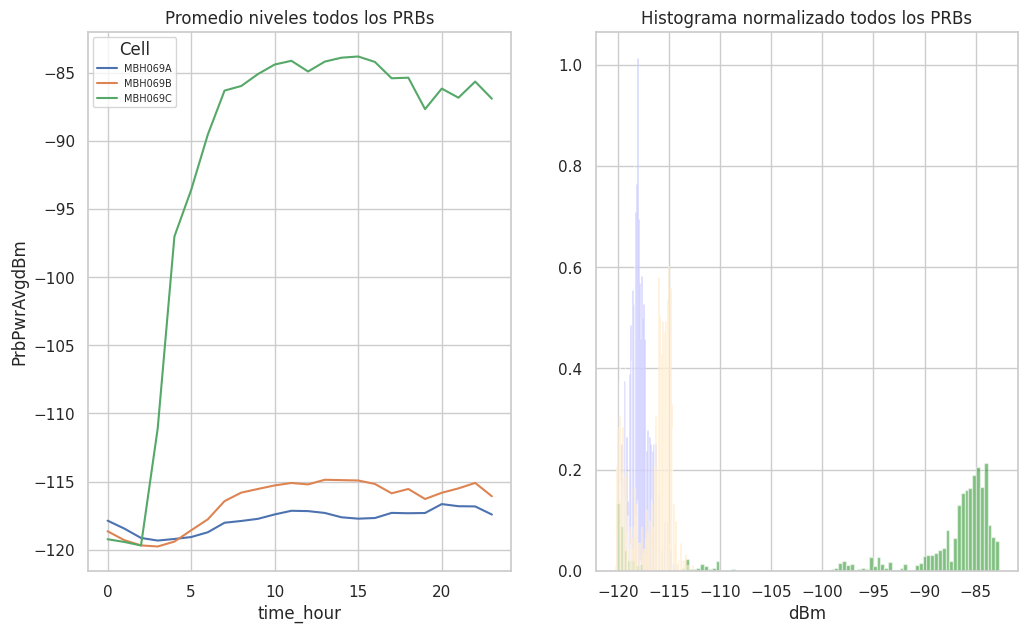

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBH069A|MBH069B|MBH069C') ], hue='Cell', ax=axes[0]).set(title='Promedio niveles todos los PRBs')

#axes[1].hist(dataset[col1[0:50]].to_numpy().flatten(), bins=100,density=True)
#sns.histplot(data=dataset_all[[col1[0:50]]][dataset_all['Cell'].str.contains('MBH069A|MBH069B|MBH069C') ], ax=axes[1]).set(title='Promedio niveles todos los PRBs')
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH069A') ].to_numpy().flatten(), bins=100,density=True, color='blue', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH069C') ].to_numpy().flatten(), bins=100,density=True, color='green', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH069B') ].to_numpy().flatten(), bins=100,density=True, color='orange', alpha=0.5);

axes[1].set(title='Histograma normalizado todos los PRBs')
axes[1].set_xlabel('dBm')


[Text(0.5, 1.0, 'Promedio niveles todos los PRBs')]

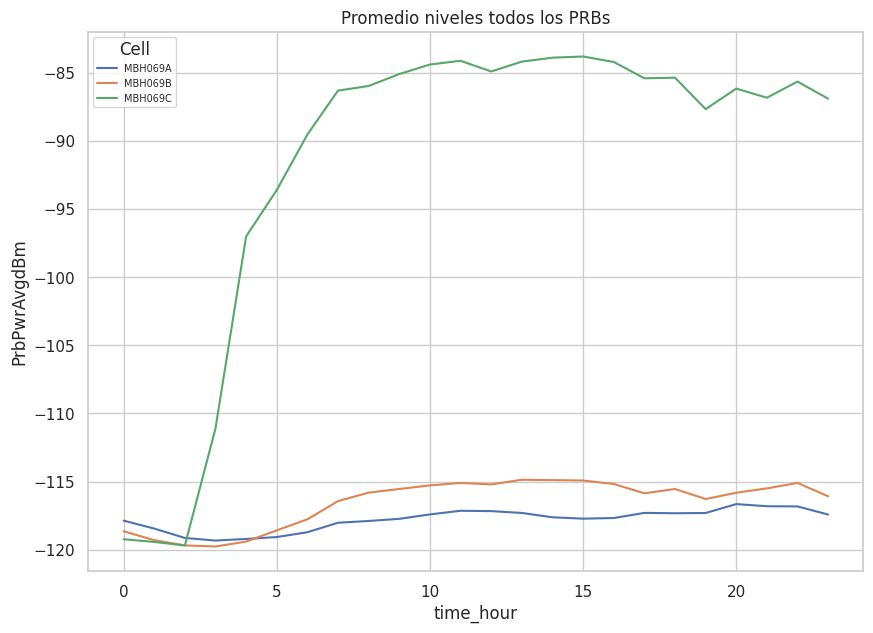

In [51]:
sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBH069A|MBH069B|MBH069C') ], hue='Cell').set(title='Promedio niveles todos los PRBs')

<Figure size 1000x600 with 0 Axes>

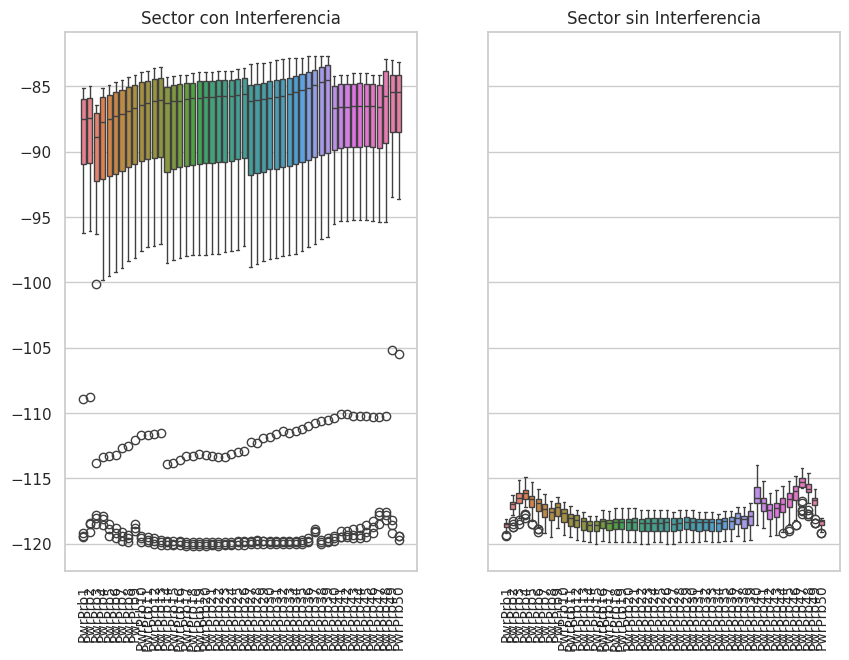

In [52]:
plt.figure(figsize=(10,6))
f, axes = plt.subplots(1, 2, sharey=True)

sns.boxplot(data=dataset_all[col1[0:50]][dataset_all['Cell'].str.contains('MBH069C') ], ax=axes[0]).set(title='Sector con Interferencia')
#plt.ylabel('dBm')

axes[0].tick_params(axis='x', labelrotation=90 )
#plt.xticks(fontsize=8);
axes[0].xaxis.set_tick_params(labelsize=10)
axes[0].locator_params(axis='x', nbins=20)
sns.boxplot(data=dataset_all[col1[0:50]][dataset_all['Cell'].str.contains('MBH069A') ], ax=axes[1]).set(title='Sector sin Interferencia')

#plt.ylabel('dBm')
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].xaxis.set_tick_params(labelsize=10)
axes[1].locator_params(axis='x', nbins=20)


plt.show()

Text(0.5, 0, 'dBm')

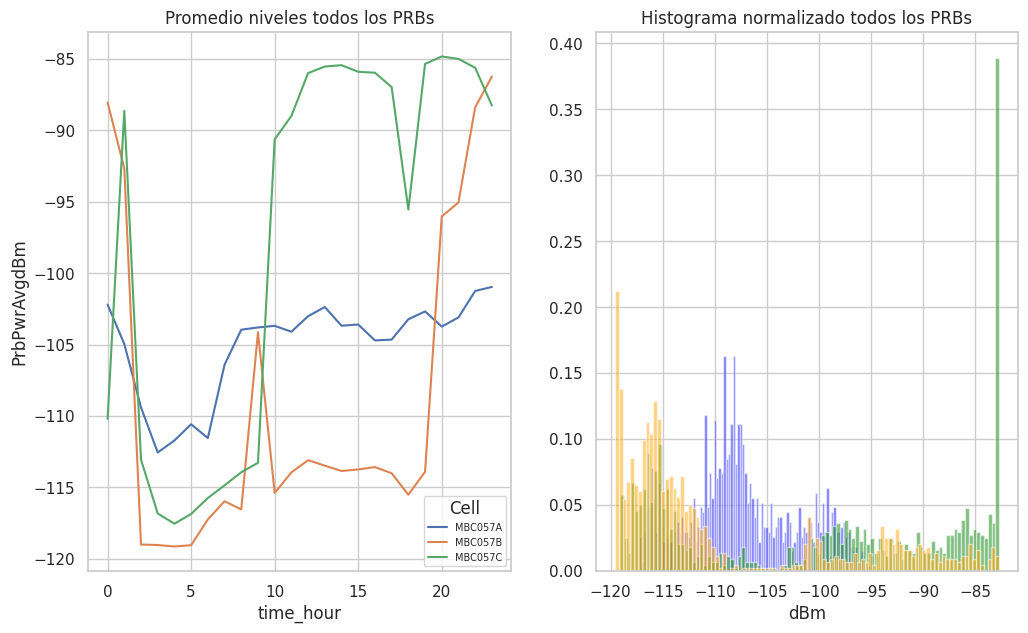

In [53]:
#sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBC057A|MBC057B|MBC057C') ], hue='Cell').set(title='Promedio niveles todos los PRBs')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBC057A|MBC057B|MBC057C') ], hue='Cell', ax=axes[0]).set(title='Promedio niveles todos los PRBs')

#axes[1].hist(dataset[col1[0:50]].to_numpy().flatten(), bins=100,density=True)
#sns.histplot(data=dataset_all[[col1[0:50]]][dataset_all['Cell'].str.contains('MBH069A|MBH069B|MBH069C') ], ax=axes[1]).set(title='Promedio niveles todos los PRBs')
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBC057A') ].to_numpy().flatten(), bins=100,density=True, color='blue', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBC057C') ].to_numpy().flatten(), bins=100,density=True, color='green', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBC057B') ].to_numpy().flatten(), bins=100,density=True, color='orange', alpha=0.5);

axes[1].set(title='Histograma normalizado todos los PRBs')
axes[1].set_xlabel('dBm')

Text(0.5, 0, 'dBm')

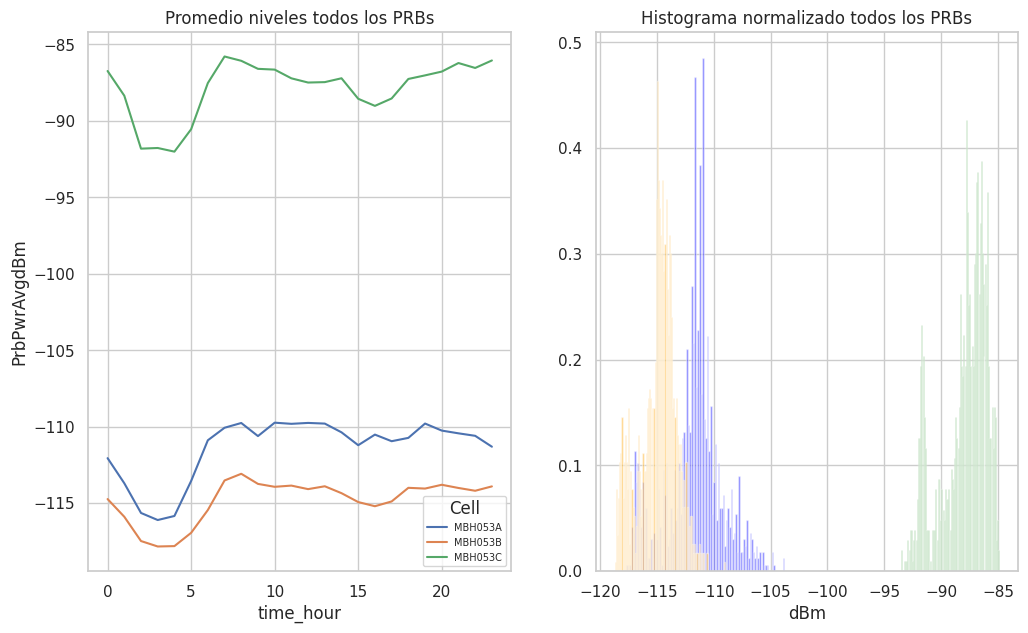

In [54]:
#sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBH053A|MBH053B|MBH053C') ], hue='Cell').set(title='Promedio niveles todos los PRBs')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.lineplot(x='time_hour', y='PrbPwrAvgdBm', data=dataset_all[dataset_all['Cell'].str.contains('MBH053A|MBH053B|MBH053C') ], hue='Cell', ax=axes[0]).set(title='Promedio niveles todos los PRBs')

#axes[1].hist(dataset[col1[0:50]].to_numpy().flatten(), bins=100,density=True)
#sns.histplot(data=dataset_all[[col1[0:50]]][dataset_all['Cell'].str.contains('MBH069A|MBH069B|MBH069C') ], ax=axes[1]).set(title='Promedio niveles todos los PRBs')
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH053A') ].to_numpy().flatten(), bins=100,density=True, color='blue', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH053B') ].to_numpy().flatten(), bins=100,density=True, color='orange', alpha=0.5);
axes[1].hist(dataset[col1[0:50]][dataset_all['Cell'].str.contains('MBH053C') ].to_numpy().flatten(), bins=100,density=True, color='green', alpha=0.5);

axes[1].set(title='Histograma normalizado todos los PRBs')
axes[1].set_xlabel('dBm')

### Prueba un metodo de clustering para comparar con los datos que tengo de celdas interferidas

In [55]:
 from sklearn.cluster import KMeans

In [56]:
dataset_mw.fillna(0, inplace=True)

In [57]:
dataset_mw.drop(dataset_mw[dataset_mw['PrbPwrAvg']==0].index, inplace=True)

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dataset_mw)


In [59]:
dataset_mw['cluster']=kmeans.labels_

In [60]:
df_mw=pd.concat([dataset['Cell'],dataset_mw],axis=1)

In [61]:
df_mw.tail()

,Cell,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,PwrPrb8,PwrPrb9,...,PwrPrb94,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,PrbPwrAvg,PrbPwrAvgdBm,cluster
137195,MWW030C,1.023293e-09,1.023293e-09,1.000000e-09,1.071519e-09,1.047129e-09,1.000000e-09,1.000000e-09,9.772372e-10,9.772372e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.812764e-10,-120.082087,2.0
137196,MWW030C,1.023293e-09,1.000000e-09,1.047129e-09,1.047129e-09,1.047129e-09,9.549926e-10,9.549926e-10,9.549926e-10,9.332543e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.667758e-10,-120.146743,2.0
137197,MWW030C,1.047129e-09,1.000000e-09,1.000000e-09,1.071519e-09,1.071519e-09,9.772372e-10,9.549926e-10,9.549926e-10,9.549926e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.729780e-10,-120.118970,2.0
137198,MWW030C,1.096478e-09,1.000000e-09,1.000000e-09,1.122018e-09,1.122018e-09,1.000000e-09,9.772372e-10,9.772372e-10,9.549926e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.837740e-10,-120.071046,2.0
137199,MWW030C,1.047129e-09,1.000000e-09,1.000000e-09,1.202264e-09,1.202264e-09,1.000000e-09,9.772372e-10,9.772372e-10,9.772372e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007663e-09,-119.966847,2.0


In [62]:
df_mw.groupby('cluster', as_index=False).count()

,cluster,Cell,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,PwrPrb8,...,PwrPrb93,PwrPrb94,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,PrbPwrAvg,PrbPwrAvgdBm
0,0.0,65326,65326,65326,65326,65326,65326,65326,65326,65326,...,65326,65326,65326,65326,65326,65326,65326,65326,65326,65326
1,1.0,24090,24090,24090,24090,24090,24090,24090,24090,24090,...,24090,24090,24090,24090,24090,24090,24090,24090,24090,24090
2,2.0,45354,45354,45354,45354,45354,45354,45354,45354,45354,...,45354,45354,45354,45354,45354,45354,45354,45354,45354,45354


### Agrego al dataframe origina el campo objetivo definido con un analisis previo en base a conocimiento de radiofrecuencia. el objetivo del trabajo es automatizar esto con un algoritmo de clasificacion

In [63]:
#pd.merge(df1, df2, left_index=True, right_index=True)
df_total=pd.merge(dataset, objetivo, left_index=True, right_index=True)

In [64]:
df_total.head()

,EnodeB_x,Cell_x,time_x,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,...,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100,time_hour,time_date,EnodeB_y,Cell_y,time_y,Interferida
0,SB0041,MB0041A,2023-03-03 00:00:00,-116.7,-116.6,-116.5,-116.2,-116.7,-116.7,-116.3,...,NaN,NaN,NaN,NaN,0,2023-03-03,SB0041,MB0041A,3/3/2023,NaN
1,SB0041,MB0041A,2023-03-03 01:00:00,-116.7,-116.5,-116.6,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,1,2023-03-03,SB0041,MB0041A,3/3/2023,NaN
2,SB0041,MB0041A,2023-03-03 02:00:00,-116.7,-116.5,-116.7,-116.3,-116.7,-116.7,-116.4,...,NaN,NaN,NaN,NaN,2,2023-03-03,SB0041,MB0041A,3/3/2023,NaN
3,SB0041,MB0041A,2023-03-03 03:00:00,-116.6,-116.5,-116.7,-116.4,-116.7,-116.6,-116.2,...,NaN,NaN,NaN,NaN,3,2023-03-03,SB0041,MB0041A,3/3/2023,NaN
4,SB0041,MB0041A,2023-03-03 04:00:00,-116.6,-116.5,-116.7,-116.4,-116.8,-116.7,-116.3,...,NaN,NaN,NaN,NaN,4,2023-03-03,SB0041,MB0041A,3/3/2023,NaN


### Ensayo de modelos

Ensayamos un modelo random Forest default para ajustar el pipeline de python

In [65]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Preparamos el dataset, pasando la variable categorica objetivo a valores numericos y seleccionando las columnas de niveles de señal por PRBs (50 columnas).

In [66]:
# Split the data into features (X) and target (y)
X = df_total.drop(['Interferida','EnodeB_x', 'Cell_x', 'time_x','time_hour','time_date', 'EnodeB_y', 'Cell_y', 'time_y'], axis=1)
X=X[col1[0:50]] # me quedo con las 50 columnas que tienen datos
X.fillna(0, inplace=True) #na x ceros
y = df_total['Interferida']
y.fillna(0, inplace=True) # reemplazo nan x cero
y=y.replace({'Y1':1, 'Y2':2,'Y3':3}) #  mapeo clase a numerico


Separamos Train y Test como 80% y 20% de la muestra respectvamente. Teniendo precaucion de hacerlo estratificado para que se respeten los porcentages de la variable de salida en ambs subconjuntos.

In [67]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Usamos random search para encontrar el mejor modelo posible a traves de este metodo.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [69]:
print(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

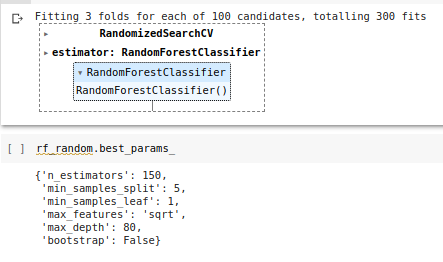

utilizo el mejor modelo obtenido con randomsearch sobre los datos y recalculo la performance del mismo

In [71]:
rf1 = RandomForestClassifier(n_estimators= 150, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 80, random_state=20, bootstrap= False)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=5,
                       n_estimators=150, random_state=20)

In [72]:
y_pred = rf1.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9997084548104956


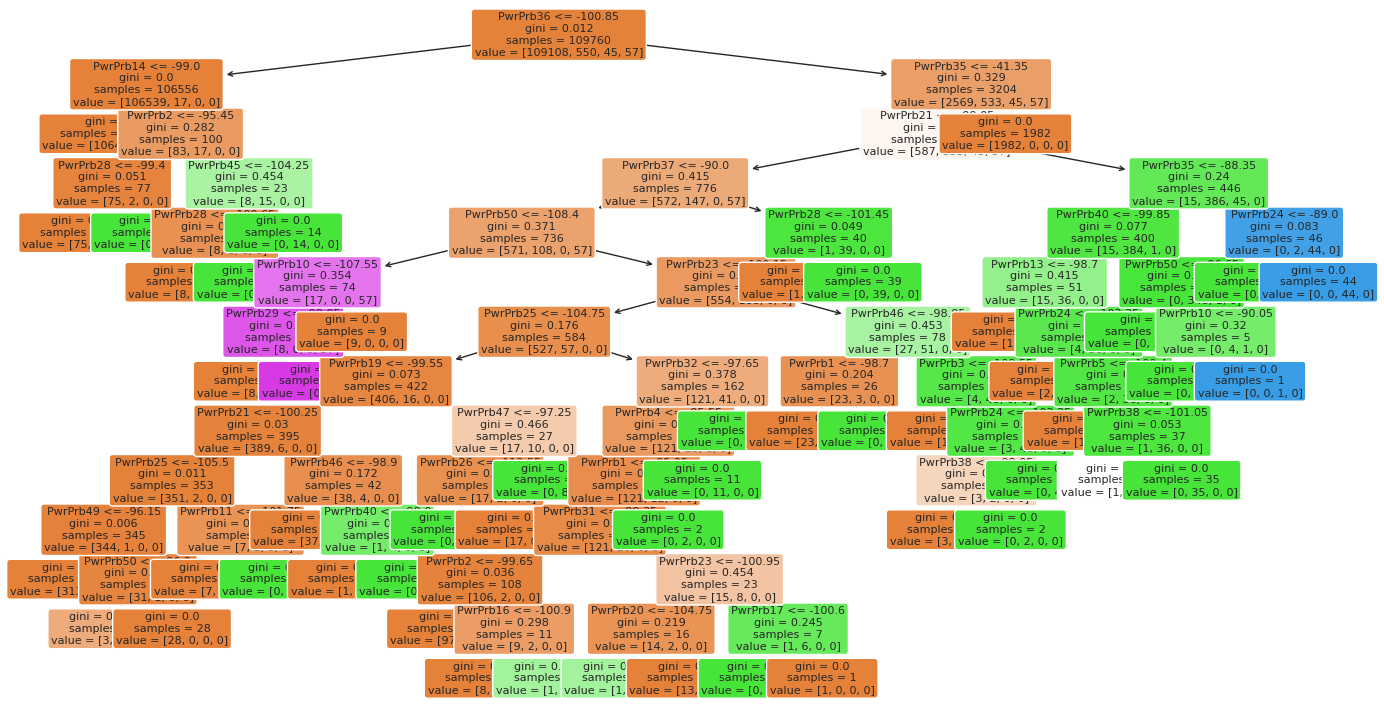

In [74]:
from sklearn import tree

features = X_train.columns
# Obtain just the first tree
first_tree = rf1.estimators_[0]

plt.figure(figsize=(17,9))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8,
               filled=True,
               rounded=True);

In [75]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[27273,     4,     0,     0],
       [    2,   135,     0,     0],
       [    0,     2,     9,     0],
       [    0,     0,     0,    15]])

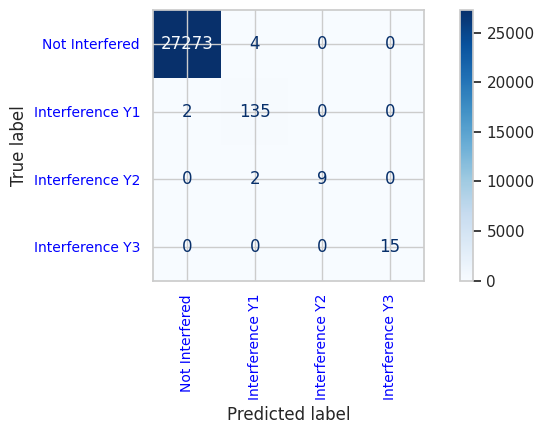

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Interfered','Interference Y1','Interference Y2','Interference Y3'])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.xticks(fontsize=10, rotation=90, color='blue');
plt.yticks(fontsize=10, color='blue');


Tree based machine learning algorithms such as Random Forest and XGBoost come with a feature importance attribute that outputs an array containing a value between 0 and 100 for each feature representing how useful the model found each feature in trying to predict the target. This gives us the opportunity to analyse what contributed to the accuracy of the model and what features were just noise.

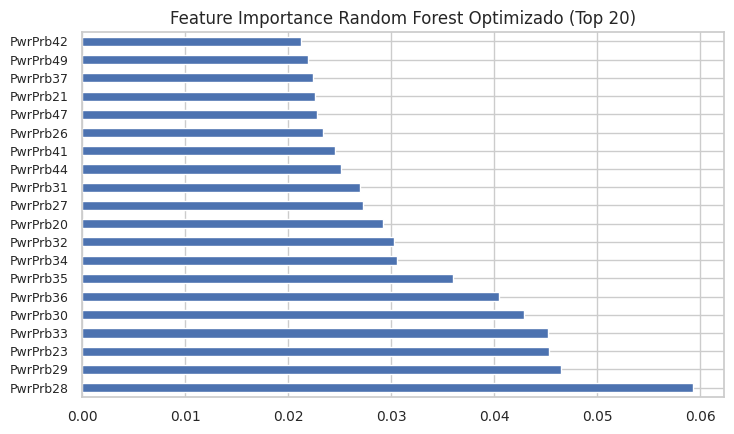

In [77]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.yticks( fontsize=9);
plt.xticks( fontsize=10);
plt.title('Feature Importance Random Forest Optimizado (Top 20)');

### probamos un xgboost

In [78]:

import xgboost as xgb

In [79]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)
clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)


In [80]:
accuracy = accuracy_score(y_test, preds_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9993440233236152


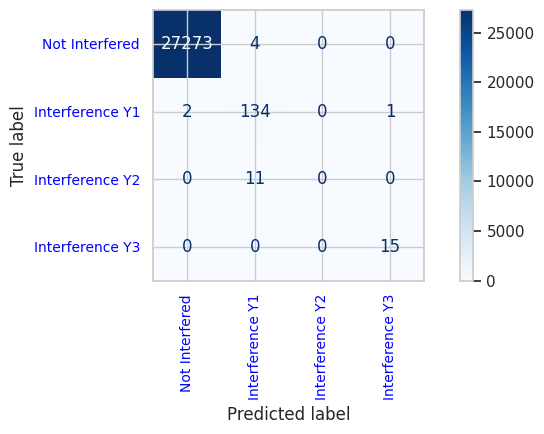

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
cm = confusion_matrix(y_test, preds_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Interfered','Interference Y1','Interference Y2','Interference Y3'])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.xticks(fontsize=10, rotation=90, color='blue');
plt.yticks(fontsize=10, color='blue');


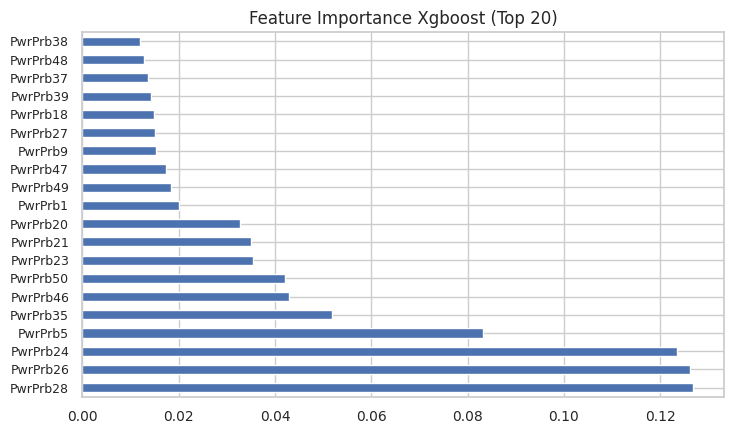

In [82]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
feat_importances = pd.Series(clf_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.yticks( fontsize=9);
plt.xticks( fontsize=10);
plt.title('Feature Importance Xgboost (Top 20)');

### Probamos redes neuronales para ver la comparasion con random forest

la red necesita tener valores normalizados de los features de entrada y ademas por la estructura de la red, como necesitamos 4 salidas de clasificacion, la variable objetivo se separara en columnas por clases (dummies).

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [84]:
y1_train=pd.get_dummies(y_train) # paso de una columna con 4 subclases a 4 columnas, una por clase
y1_test=pd.get_dummies(y_test)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)
X1_train = scaler.transform(X_train) # normalizo X_train

In [86]:
scaler = StandardScaler()
scaler.fit(X_test)
X1_test = scaler.transform(X_test) # normalizo X_test

In [87]:
# Define the neural network architecture
# Neural network
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=50, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 1072 (4.19 KB)
Trainable params: 1072 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
# Compile the neural network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
 history = model.fit(X1_train, y1_train,
                     #batch_size=batch_size,
                     epochs=20,
                     validation_data=(X1_test, y1_test))

Epoch 1/20
3430/3430 [==============================] - 9s 2ms/step - loss: 0.0770 - accuracy: 0.9916 - val_loss: 0.0283 - val_accuracy: 0.9941
Epoch 2/20
3430/3430 [==============================] - 8s 2ms/step - loss: 0.0260 - accuracy: 0.9941 - val_loss: 0.0244 - val_accuracy: 0.9941
Epoch 3/20
3430/3430 [==============================] - 11s 3ms/step - loss: 0.0225 - accuracy: 0.9941 - val_loss: 0.0212 - val_accuracy: 0.9941
Epoch 4/20
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0185 - val_accuracy: 0.9941
Epoch 5/20
3430/3430 [==============================] - 9s 3ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0160 - val_accuracy: 0.9941
Epoch 6/20
3430/3430 [==============================] - 7s 2ms/step - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.0142 - val_accuracy: 0.9941
Epoch 7/20
3430/3430 [==============================] - 11s 3ms/step - loss: 0.0126 - accuracy: 0.9944 - val_loss: 0.0120 - val_accura

In [91]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [92]:
print(history.history['val_loss'])

[0.028268758207559586, 0.024373851716518402, 0.02124173939228058, 0.01847805827856064, 0.016040535643696785, 0.014154118485748768, 0.012000144459307194, 0.010659703984856606, 0.009499972686171532, 0.00858006626367569, 0.007647000718861818, 0.006852246820926666, 0.006466607563197613, 0.005950193852186203, 0.006666586734354496, 0.005224491935223341, 0.005558771081268787, 0.004994862247258425, 0.004539794288575649, 0.004261167254298925]


Test loss: 0.004261167254298925
Test accuracy: 0.9987973570823669


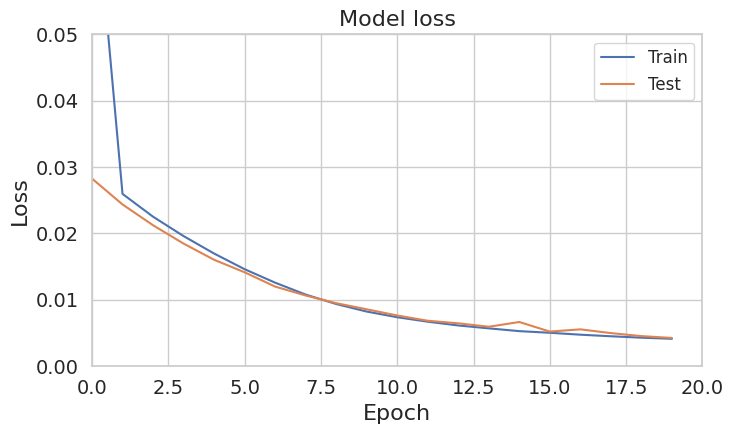

In [93]:
# Evaluate the model on the test data
score = model.evaluate(X1_test, y1_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the training and test error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['Train', 'Test'], loc='upper right', fontsize=12)
plt.ylim([0, 0.05])
plt.xlim([0, 20])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=22)
plt.show()

In [94]:
# Get the test set predictions
y_pred = model.predict(X1_test)

858/858 [==============================] - 2s 2ms/step


Antes de evaluar el desempeño del modelo necesitamos reordenar las predicciones nuevamente como una columna con las clases definidas al comienzo. La red construida nos da un vector de 4 posiciones de suma 1 (probabilidad a traves de softmax). Lo que hacemos es quedarnos con la posicion en este vector del valor de mayor probabilidad. \\
Por como se definieron los dummies:

[0]--> no interf
[1]--> interf Y1
[2]--> interf Y2
[3]--> interf Y3

Esta asignacion coincide con el vector original numerico de variable objetivo.

In [95]:
Y_pred=[]
for fila in y_pred:
  idx=np.argmax(fila )
  Y_pred.append(idx)


Observar que utilizamos el vector original objetivo que contiene una columna con clases asignadas a valores numericos 0,1,2,3.

In [96]:
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9987973760932944


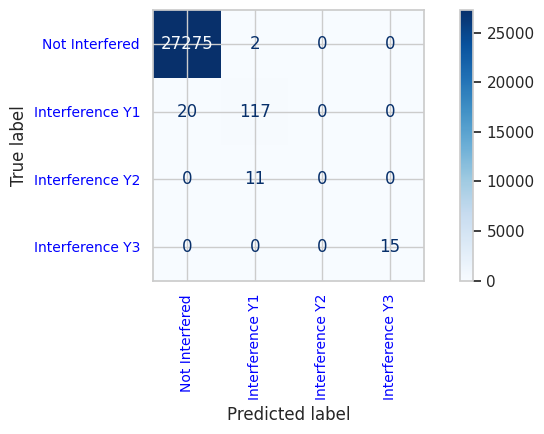

In [97]:
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Interfered','Interference Y1','Interference Y2','Interference Y3'])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

plt.xticks(fontsize=10, rotation=90, color='blue');
plt.yticks(fontsize=10, color='blue');

probamos con una red neuronal mas densa

In [98]:
model1 = Sequential()
model1.add(Dense(16, input_dim=50, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(4, activation='softmax'))

In [99]:
# Compile the neural network
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [100]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                816       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 4)                 52        
                                                                 
Total params: 1228 (4.80 KB)
Trainable params: 1228 (4.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/15
3430/3430 [==============================] - 10s 2ms/step - loss: 0.0511 - accuracy: 0.9921 - val_loss: 0.0208 - val_accuracy: 0.9941
Epoch 2/15
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0178 - val_accuracy: 0.9941
Epoch 3/15
3430/3430 [==============================] - 7s 2ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.0156 - val_accuracy: 0.9941
Epoch 4/15
3430/3430 [==============================] - 9s 3ms/step - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.0140 - val_accuracy: 0.9941
Epoch 5/15
3430/3430 [==============================] - 9s 3ms/step - loss: 0.0132 - accuracy: 0.9941 - val_loss: 0.0127 - val_accuracy: 0.9941
Epoch 6/15
3430/3430 [==============================] - 8s 2ms/step - loss: 0.0120 - accuracy: 0.9941 - val_loss: 0.0116 - val_accuracy: 0.9941
Epoch 7/15
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0109 - accuracy: 0.9941 - val_loss: 0.0106 - val_accura

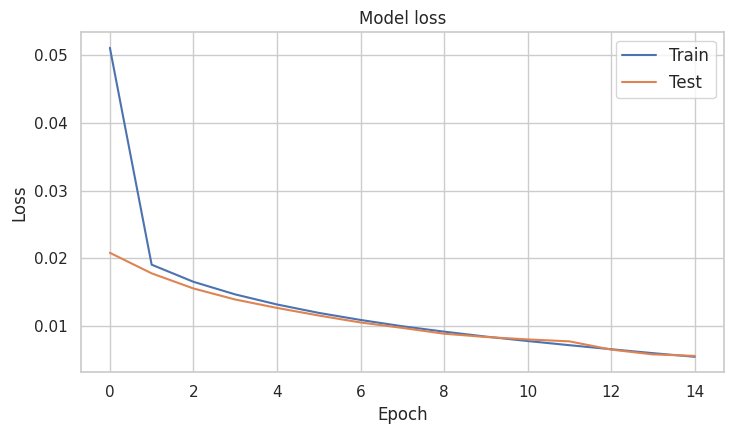

In [101]:
history = model1.fit(X1_train, y1_train,
                     #batch_size=batch_size,
                     epochs=15,
                     validation_data=(X1_test, y1_test))


# Evaluate the model on the test data
score = model1.evaluate(X1_test, y1_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the training and test error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', fontsize=12)
#plt.legend(fontsize=22)
plt.show()

In [102]:
model2 = Sequential()
model2.add(Dense(100, input_dim=50, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [103]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 4)                 124       
                                                                 
Total params: 11804 (46.11 KB)
Trainable params: 11804 (46.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# Compile the neural network
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
history = model2.fit(X1_train, y1_train,
                     #batch_size=batch_size,
                     epochs=20,
                     validation_data=(X1_test, y1_test))


# Evaluate the model on the test data
score = model1.evaluate(X1_test, y1_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
3430/3430 [==============================] - 11s 3ms/step - loss: 0.0488 - accuracy: 0.9932 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 2/20
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0152 - val_accuracy: 0.9941
Epoch 3/20
3430/3430 [==============================] - 8s 2ms/step - loss: 0.0128 - accuracy: 0.9941 - val_loss: 0.0112 - val_accuracy: 0.9942
Epoch 4/20
3430/3430 [==============================] - 10s 3ms/step - loss: 0.0100 - accuracy: 0.9950 - val_loss: 0.0090 - val_accuracy: 0.9960
Epoch 5/20
3430/3430 [==============================] - 9s 3ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0073 - val_accuracy: 0.9973
Epoch 6/20
3430/3430 [==============================] - 12s 3ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0063 - val_accuracy: 0.9975
Epoch 7/20
3430/3430 [==============================] - 9s 3ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0057 - val_accur

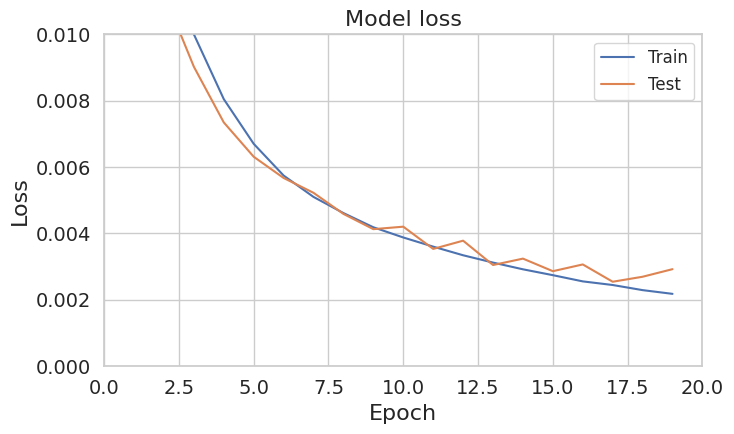

In [106]:

# Plot the training and test error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['Train', 'Test'], loc='upper right', fontsize=12)
plt.ylim([0, 0.01])
plt.xlim([0, 20])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=22)
plt.show()

In [107]:
# Get the test set predictions
y_pred = model.predict(X1_test)

858/858 [==============================] - 1s 1ms/step


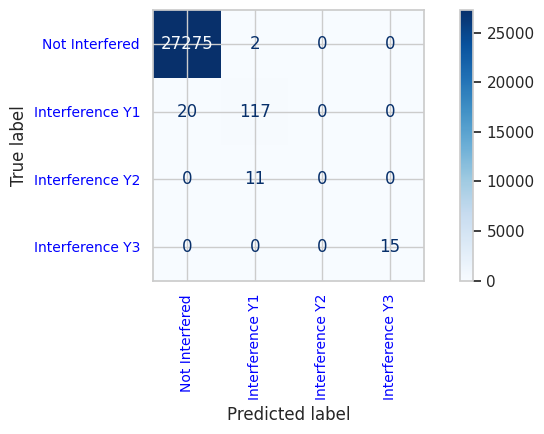

In [108]:
Y_pred=[]
for fila in y_pred:
  idx=np.argmax(fila )
  Y_pred.append(idx)


cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Interfered','Interference Y1','Interference Y2','Interference Y3'])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.xticks(fontsize=10, rotation=90, color='blue');
plt.yticks(fontsize=10, color='blue');

### deteccion de sectores interferidos y publicacion de resultados

me quedo con el algoritmo de random forest porque performa mejor o igual al de redes neuronales. y es mas simple su aplicacion e interpretacion

In [109]:
dataset_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesis I/Dataset/_select_from_estadisticas_lte_erbs_eutrancellfdd_ul_inter_hour_w_202303221047.zip')

In [110]:
dataset_new.fillna(0, inplace=True) #na x ceros

In [111]:
col={'pmRadioRecInterferencePwrPrb1':'PwrPrb1','pmRadioRecInterferencePwrPrb2':'PwrPrb2','pmRadioRecInterferencePwrPrb3':'PwrPrb3','pmRadioRecInterferencePwrPrb4':'PwrPrb4','pmRadioRecInterferencePwrPrb5':'PwrPrb5',
'pmRadioRecInterferencePwrPrb6':'PwrPrb6','pmRadioRecInterferencePwrPrb7':'PwrPrb7','pmRadioRecInterferencePwrPrb8':'PwrPrb8','pmRadioRecInterferencePwrPrb9':'PwrPrb9',
'pmRadioRecInterferencePwrPrb10':'PwrPrb10','pmRadioRecInterferencePwrPrb11':'PwrPrb11','pmRadioRecInterferencePwrPrb12':'PwrPrb12','pmRadioRecInterferencePwrPrb13':'PwrPrb13',
'pmRadioRecInterferencePwrPrb14':'PwrPrb14','pmRadioRecInterferencePwrPrb15':'PwrPrb15','pmRadioRecInterferencePwrPrb16':'PwrPrb16','pmRadioRecInterferencePwrPrb17':'PwrPrb17',
'pmRadioRecInterferencePwrPrb18':'PwrPrb18','pmRadioRecInterferencePwrPrb19':'PwrPrb19','pmRadioRecInterferencePwrPrb20':'PwrPrb20','pmRadioRecInterferencePwrPrb21':'PwrPrb21',
'pmRadioRecInterferencePwrPrb22':'PwrPrb22','pmRadioRecInterferencePwrPrb23':'PwrPrb23','pmRadioRecInterferencePwrPrb24':'PwrPrb24','pmRadioRecInterferencePwrPrb25':'PwrPrb25',
'pmRadioRecInterferencePwrPrb26':'PwrPrb26','pmRadioRecInterferencePwrPrb27':'PwrPrb27','pmRadioRecInterferencePwrPrb28':'PwrPrb28','pmRadioRecInterferencePwrPrb29':'PwrPrb29',
'pmRadioRecInterferencePwrPrb30':'PwrPrb30','pmRadioRecInterferencePwrPrb31':'PwrPrb31','pmRadioRecInterferencePwrPrb32':'PwrPrb32','pmRadioRecInterferencePwrPrb33':'PwrPrb33',
'pmRadioRecInterferencePwrPrb34':'PwrPrb34','pmRadioRecInterferencePwrPrb35':'PwrPrb35','pmRadioRecInterferencePwrPrb36':'PwrPrb36','pmRadioRecInterferencePwrPrb37':'PwrPrb37',
'pmRadioRecInterferencePwrPrb38':'PwrPrb38','pmRadioRecInterferencePwrPrb39':'PwrPrb39','pmRadioRecInterferencePwrPrb40':'PwrPrb40','pmRadioRecInterferencePwrPrb41':'PwrPrb41',
'pmRadioRecInterferencePwrPrb42':'PwrPrb42','pmRadioRecInterferencePwrPrb43':'PwrPrb43','pmRadioRecInterferencePwrPrb44':'PwrPrb44','pmRadioRecInterferencePwrPrb45':'PwrPrb45',
'pmRadioRecInterferencePwrPrb46':'PwrPrb46','pmRadioRecInterferencePwrPrb47':'PwrPrb47','pmRadioRecInterferencePwrPrb48':'PwrPrb48','pmRadioRecInterferencePwrPrb49':'PwrPrb49',
'pmRadioRecInterferencePwrPrb50':'PwrPrb50','pmRadioRecInterferencePwrPrb51':'PwrPrb51','pmRadioRecInterferencePwrPrb52':'PwrPrb52','pmRadioRecInterferencePwrPrb53':'PwrPrb53',
'pmRadioRecInterferencePwrPrb54':'PwrPrb54','pmRadioRecInterferencePwrPrb55':'PwrPrb55','pmRadioRecInterferencePwrPrb56':'PwrPrb56','pmRadioRecInterferencePwrPrb57':'PwrPrb57',
'pmRadioRecInterferencePwrPrb58':'PwrPrb58','pmRadioRecInterferencePwrPrb59':'PwrPrb59','pmRadioRecInterferencePwrPrb60':'PwrPrb60','pmRadioRecInterferencePwrPrb61':'PwrPrb61',
'pmRadioRecInterferencePwrPrb62':'PwrPrb62','pmRadioRecInterferencePwrPrb63':'PwrPrb63','pmRadioRecInterferencePwrPrb64':'PwrPrb64','pmRadioRecInterferencePwrPrb65':'PwrPrb65',
'pmRadioRecInterferencePwrPrb66':'PwrPrb66','pmRadioRecInterferencePwrPrb67':'PwrPrb67','pmRadioRecInterferencePwrPrb68':'PwrPrb68','pmRadioRecInterferencePwrPrb69':'PwrPrb69',
'pmRadioRecInterferencePwrPrb70':'PwrPrb70','pmRadioRecInterferencePwrPrb71':'PwrPrb71','pmRadioRecInterferencePwrPrb72':'PwrPrb72','pmRadioRecInterferencePwrPrb73':'PwrPrb73',
'pmRadioRecInterferencePwrPrb74':'PwrPrb74','pmRadioRecInterferencePwrPrb75':'PwrPrb75','pmRadioRecInterferencePwrPrb76':'PwrPrb76','pmRadioRecInterferencePwrPrb77':'PwrPrb77',
'pmRadioRecInterferencePwrPrb78':'PwrPrb78','pmRadioRecInterferencePwrPrb79':'PwrPrb79','pmRadioRecInterferencePwrPrb80':'PwrPrb80','pmRadioRecInterferencePwrPrb81':'PwrPrb81',
'pmRadioRecInterferencePwrPrb82':'PwrPrb82','pmRadioRecInterferencePwrPrb83':'PwrPrb83','pmRadioRecInterferencePwrPrb84':'PwrPrb84','pmRadioRecInterferencePwrPrb85':'PwrPrb85',
'pmRadioRecInterferencePwrPrb86':'PwrPrb86','pmRadioRecInterferencePwrPrb87':'PwrPrb87','pmRadioRecInterferencePwrPrb88':'PwrPrb88','pmRadioRecInterferencePwrPrb89':'PwrPrb89',
'pmRadioRecInterferencePwrPrb90':'PwrPrb90','pmRadioRecInterferencePwrPrb91':'PwrPrb91','pmRadioRecInterferencePwrPrb92':'PwrPrb92','pmRadioRecInterferencePwrPrb93':'PwrPrb93',
'pmRadioRecInterferencePwrPrb94':'PwrPrb94','pmRadioRecInterferencePwrPrb95':'PwrPrb95','pmRadioRecInterferencePwrPrb96':'PwrPrb96','pmRadioRecInterferencePwrPrb97':'PwrPrb97',
'pmRadioRecInterferencePwrPrb98':'PwrPrb98','pmRadioRecInterferencePwrPrb99':'PwrPrb99','pmRadioRecInterferencePwrPrb100':'PwrPrb100'}

In [112]:
dataset_new.rename(columns=col, inplace=True)

In [113]:
dataset_new.head()

,EnodeB,Cell,time,PwrPrb1,PwrPrb2,PwrPrb3,PwrPrb4,PwrPrb5,PwrPrb6,PwrPrb7,...,PwrPrb91,PwrPrb92,PwrPrb93,PwrPrb94,PwrPrb95,PwrPrb96,PwrPrb97,PwrPrb98,PwrPrb99,PwrPrb100
0,SB0041,MB0041A,2023-03-02 00:00:00.0,-116.7,-116.5,-116.6,-116.4,-116.7,-116.8,-116.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SB0041,MB0041A,2023-03-02 01:00:00.0,-116.7,-116.5,-116.5,-116.3,-116.7,-116.8,-116.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SB0041,MB0041A,2023-03-02 02:00:00.0,-116.7,-116.5,-116.0,-115.8,-116.5,-116.6,-116.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SB0041,MB0041A,2023-03-02 03:00:00.0,-116.7,-116.5,-116.6,-116.4,-116.7,-116.7,-116.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SB0041,MB0041A,2023-03-02 04:00:00.0,-116.7,-116.5,-116.6,-116.4,-116.8,-116.8,-116.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
X=dataset_new.iloc[:,3 :53]

In [115]:
dataset_new['Interferido']=rf1.predict(X)

In [116]:
dataset_new['sitio']=dataset_new['Cell'].str.slice(1,6)

In [117]:
dataset_new['Interferido'].unique()

array([0, 1, 2, 3])

In [118]:
cant_horas_interferidas=dataset_new[['EnodeB','Cell']][dataset_new['Interferido']>0].groupby('Cell').count()

In [119]:
sospechosos=cant_horas_interferidas[cant_horas_interferidas['EnodeB']>6].reset_index() # mas de 25% del dia interf lo consideramos como problema

In [120]:
sospechosos['sitio']=sospechosos['Cell'].str.slice(1,6)

In [121]:
nodos_sospechosos=sospechosos['sitio'].unique()

In [122]:
sitios.shape

(12669, 6)

In [123]:
sitios.head()

,nodo,sector,Latitud,Longitud,Altura,azimuth
0,AN029,1,-23.1132,-63.9979,45.0,0.0
1,AN029,2,-23.1132,-63.9979,45.0,120.0
2,AN029,3,-23.1132,-63.9979,45.0,240.0
3,AN028,1,-23.2620,-63.7400,36.0,0.0
4,AN028,2,-23.2620,-63.7400,36.0,120.0


In [124]:
sitios1=sitios.groupby('nodo').max().reset_index()
sitios1=sitios1[['nodo', 'Latitud', 'Longitud','Altura']]
sitios1.rename(columns={'Longitud':'longitude', 'Latitud':'latitude'}, inplace=True)

In [125]:
sos=sitios1[sitios1['nodo'].isin(nodos_sospechosos)].reset_index()

In [126]:
m = leafmap.Map(center=[-34.5924147924029, -62.5660425714133], zoom=5)
m.add_points_from_xy(sos, layer_name='sospechosos')
#m.add_points_from_xy(sitios1, radius=5, color="blue", fill_color="black", layer_name='sitios')
m

Map(center=[-34.5924147924029, -62.5660425714133], controls=(ZoomControl(options=['position', 'zoom_in_text', …